In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, hierarchical, AgglomerativeClustering, MiniBatchKMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, silhouette_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
import scipy.cluster.hierarchy as shc


from sklearn.datasets import load_wine

/Users/ipreoteasa/opt/anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/ipreoteasa/opt/anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/ipreoteasa/opt/anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/ipreoteasa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.hierarchical module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / funct

## ETL our data

In [2]:
# loading sklearn's wine dataset
d = load_wine()
X = pd.DataFrame(d['data'], columns=d['feature_names'])
y = pd.Series(d['target'])

In [3]:
y.isna().value_counts()

False    178
dtype: int64

In [5]:
print(d['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [9]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
# all the features are already scaled and our data is clean,given that it's a toy dataset
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [11]:
y.value_counts()

1    71
0    59
2    48
dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2)

We plot the correlation matrix, our rudimentary check for multicollinearity. At this stage we can justify using PCA. 

In [8]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

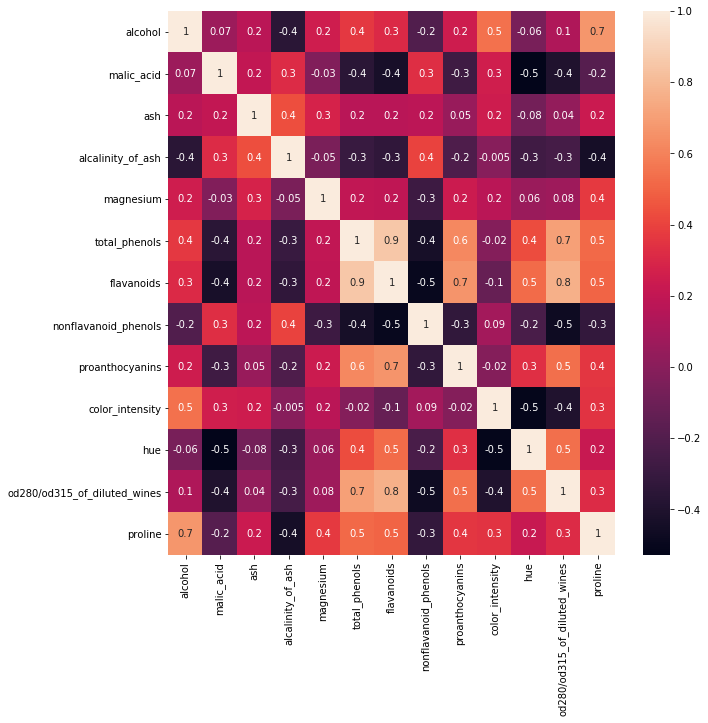

In [11]:

plt.figure(figsize=(10,10))
corr = sns.heatmap(x_train.corr(), annot=True, fmt='.1g');

## Transforming using PCA

Let's instantiate a PCA object so we can do some dimensionality reduction and get around multicollinearity.

In [25]:
pca = PCA(n_components=8)

In [26]:
pca_data = pca.fit_transform(x_train_s)

In [27]:
pca.explained_variance_ratio_

array([0.364508  , 0.18981022, 0.11722036, 0.07043407, 0.05978176,
       0.04659971, 0.04412013, 0.0245867 ])

In [28]:
pca.explained_variance_ratio_.sum()

0.917060956734348

In [29]:
len(x_train)
y_train.isna().value_counts()

False    142
dtype: int64

In [30]:
#This is what our PCA data looks like

pca_df = pd.DataFrame(pca_data, columns=[f'PC{x+1}' for x in range((pca.n_components_))])

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.628883,1.276324,0.403887,0.791289,0.763044,0.518807,-1.352465,-0.216116
1,3.050744,-0.618455,-0.299000,0.864192,0.473972,-0.038219,0.381619,-0.130447
2,3.052255,-1.955679,-0.526480,-0.333984,-0.808862,-0.081411,0.195870,-0.466530
3,-1.714466,1.001406,3.286846,-0.597565,-0.440667,0.826998,0.136048,0.089242
4,2.056573,-0.920115,-0.919808,0.902890,0.249253,-0.134891,-0.439735,-0.235243


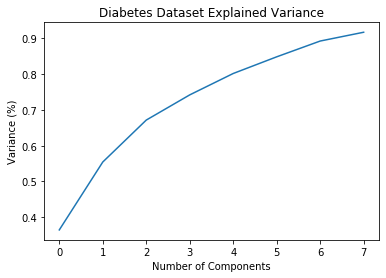

In [31]:
#Plotting the Cumulative Summation of the Explained Variance --> what does this tell us about the relative usefulness of 
#each Principal Component?
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Diabetes Dataset Explained Variance')
plt.show()

In [33]:
#going by elbow method, we see that we only need the first 4-6 components to account for most variance in this data
pca = PCA(n_components=5)
pca_data = pca.fit_transform(x_train_s)

## K-means clustering on our PCA data

In [35]:
pca_km = KMeans(n_clusters=3, random_state=43)

In [36]:
pca_km.fit(pca_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=43, tol=0.0001, verbose=0)

In [37]:
predicted = pca_km.predict(pca_data)

In [38]:
predicted

array([2, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2,
       1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1,
       1, 0, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 1, 0, 0], dtype=int32)

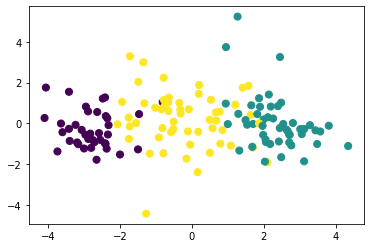

In [39]:
# Ok, so we have some quite visible clustering in this data, as it is when PCA'd. 
# Do you think it will look as clearly explainable when the data is raw?
plt.scatter(pca_data[:, 0], pca_data[:, 2], c=predicted, s=50, cmap='viridis');


In [40]:
silhouette_score(pca_data, predicted)

0.3706133378948476

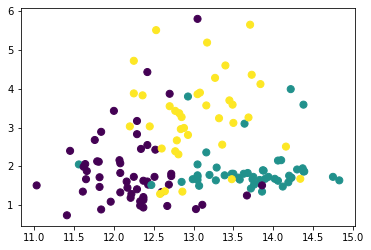

In [41]:
km = KMeans(n_clusters=3)
km.fit(x_train_s)
predicted = km.predict(x_train_s)
plt.scatter(x_train.iloc[:, 0], 
            x_train.iloc[:, 1], c=predicted, s=50, cmap='viridis');

In [42]:
silhouette_score(x_train_s, predicted)

0.28442322149309496

Although the tightness of our clusters (as indicated by Silhouette score), is similar, it's much harder to visualize this in raw data.

In [45]:
from mpl_toolkits.mplot3d import Axes3D


In [46]:
x_train.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

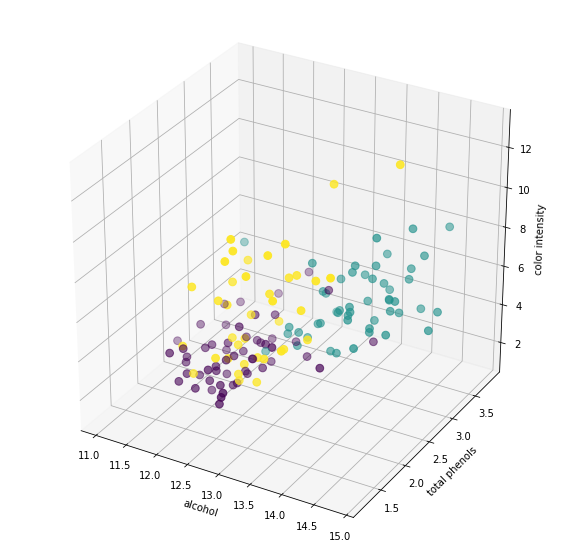

In [47]:
# Even in 3D, it's hard to see exactly why the clusters were chosen as they were
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('alcohol')
ax.set_ylabel('total phenols')
ax.set_zlabel('color intensity')
ax.scatter(x_train.alcohol, x_train.total_phenols, x_train.color_intensity, c=predicted, s=60)
# ax.view_init(15, 15)
plt.show();